In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

0 amplitudes: 1.04574 1.0355
1 amplitudes: 0.79501 1.0156
2 amplitudes: 0.89801 0.41424
3 amplitudes: 0.04066 0.689
4 amplitudes: 0.34362 0.14965
5 amplitudes: 0.43853 0.04708
6 amplitudes: 0.13637 0.08966
7 amplitudes: 0.15052 0.0673
8 amplitudes: 0.01497 0.17298
9 amplitudes: 0.02977 0.02736
10 amplitudes: 0.0458 0.00743
11 amplitudes: 0.04505 0.04208
12 amplitudes: 0.0408 0.04413
13 amplitudes: 0.00202 0.01561
14 amplitudes: 0.01602 0.00641
15 amplitudes: 0.00978 0.00678
16 amplitudes: 0.00379 0.00949
17 amplitudes: 0.00321 0.00284
18 amplitudes: 0.00696 0.00104
19 amplitudes: 0.00438 0.00574


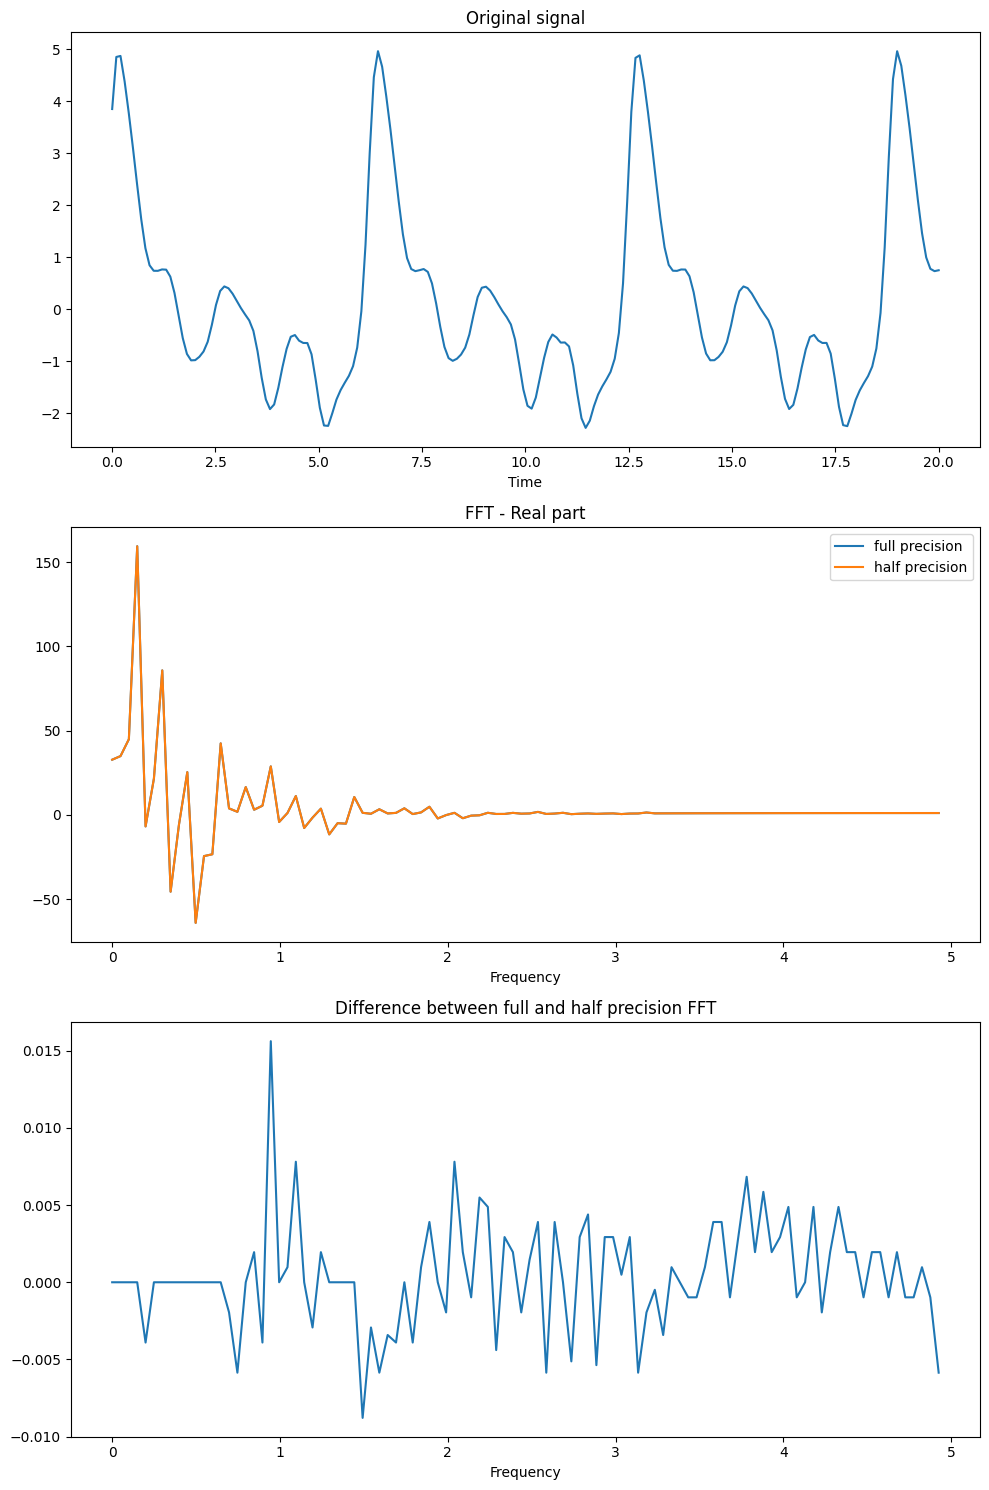

In [3]:
# Create a time series from 0 to 10 with 1000 steps 
t = np.linspace(0, 20, 200)

# Define the number of waves
num_frequencies = 20
decay_factor = .3

# Generate a signal as a sum of several sine and cosine waves with amplitudes sampled from an exponential distribution
y = np.zeros_like(t)
amplitudes = []
for i in range(num_frequencies):
    sine_amp = np.exp(-decay_factor*i)*np.maximum(.1,np.random.normal(1,.7))
    cosine_amp = np.exp(-decay_factor*i)*np.maximum(.1,np.random.normal(1,.7))
    amplitudes.append((sine_amp, cosine_amp))
    y += sine_amp * np.sin((i+1)*t)
    y += cosine_amp * np.cos((i+1)*t)

# Perform FFT
fft_full = np.fft.fft(y)
fft_half = np.fft.fft(y.astype(np.float16)).real.astype(np.float16)
frequencies = np.fft.fftfreq(len(y), d=t[1]-t[0])

diff = fft_full.real.astype(np.float16) - fft_half.real

for i in range(num_frequencies):
    print(i, 'amplitudes:', np.round(amplitudes[i][0],5),np.round(amplitudes[i][1],5))
    #print('precision difference', np.abs(y_fft))


# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot original signal
ax[0].plot(t, y)
ax[0].set_title('Original signal')
ax[0].set_xlabel('Time')

# Plot FFT (real part)
#ax[1].plot(frequencies, np.abs(fft_full.real), label='Full precision')

ax[1].plot(frequencies[:len(frequencies)//2], fft_full[:len(fft_full)//2].real, label='full precision')
ax[1].plot(frequencies[:len(frequencies)//2], fft_half[:len(fft_half)//2].real, label='half precision')
ax[1].set_title('FFT - Real part')
ax[1].set_xlabel('Frequency')
ax[1].legend()

# Plot difference
ax[2].plot(frequencies[:len(frequencies)//2], diff[:len(diff)//2])
ax[2].set_title('Difference between full and half precision FFT')
ax[2].set_xlabel('Frequency')

plt.tight_layout()
plt.show()